In [183]:
cd /home/jovyan/Practice_exercise/Madelon/

/home/jovyan/Practice_exercise/Madelon


In [184]:
import csv

%run Imports_functions.py
%matplotlib inline
from sklearn.metrics import roc_auc_score, make_scorer, precision_recall_curve, auc

In [124]:
madelon_train = pd.read_csv('/home/jovyan/Practice_exercise/Madelon/data/madelon_train.data.txt', delimiter =' ')
madelon_train.columns = list(range(501))

In [125]:
madelon_train.sample(20)

0    1    2    3    4    5    6    7    8    9   ...   491  492  493  \
1722  482  484  496  495  502  474  406  477  496  471 ...   480  493  491   
1716  484  508  483  483  505  492  464  475  457  486 ...   478  473  384   
663   484  540  471  486  524  478  498  478  491  473 ...   471  464  318   
125   478  496  493  485  432  476  436  477  489  476 ...   480  451  431   
407   485  443  465  472  532  478  497  474  492  478 ...   479  504  384   
1706  476  405  536  467  419  478  474  479  500  477 ...   490  466  544   
85    487  451  556  487  513  487  462  475  480  464 ...   475  520  745   
710   485  482  561  484  508  469  564  475  482  483 ...   481  471  486   
4     481  496  451  480  516  484  484  476  500  482 ...   481  477  435   
545   487  480  527  487  430  473  494  476  498  477 ...   474  476  562   
1992  477  501  518  496  479  472  424  476  501  486 ...   476  435  736   
984   481  498  533  478  465  482  510  478  478  477 ...   474  502  440   
1474  471  510  432  487  450  488  490  478  475  474 ...   470  541  471   
1182  484  445  515  474  513  481  426  478  491  479 ...   479  475  451   
742   489  441  527  468  482  480  468  477  492  477 ...   470  544  415   
1120  486  491  484  495  463  474  537  478  502  474 ...   477  489  522   
1373  470  496  443  481  511  463  372  477  457  487 ...   474  498  330   
1506  475  549  434  482  524  482  509  480  500  471 ...   478  490  565   
549   477  477  569  471  447  485  479  476  460  486 ...   481  496  599   
762   482  450  488  485  485  482  454  477  493  484 ...   483  517  484   

      494  495  496  497  498  499  500  
1722  462  520  487  482  492  495  NaN  
1716  454  512  480  470  509  495  NaN  
663   407  504  481  492  520  503  NaN  
125   495  483  478  469  467  452  NaN  
407   533  491  478  491  496  477  NaN  
1706  527  467  490  474  574  488  NaN  
85    489  487  481  474  543  455  NaN  
710   466  516  486  493  507  499  NaN  
4     491  564  482  463  457  500  NaN  
545   519  535  470  510  573  451  NaN  
1992  539  546  482  514  557  540  NaN  
984   443  498  495  483  509  510  NaN  
1474  477  446  474  487  602  521  NaN  
1182  520  526  486  497  586  463  NaN  
742   483  519  469  502  488  447  NaN  
1120  490  535  475  464  449  497  NaN  
1373  509  526  487  502  486  493  NaN  
1506  505  533  479  514  525  477  NaN  
549   467  507  478  481  545  499  NaN  
762   429  533  481  474  520  538  NaN  

[20 rows x 501 columns]

In [126]:
madelon_train = madelon_train.drop(500, axis=1)

In [127]:
madelon_train.shape

(1999, 500)

In [128]:
#madelon_train.isnull().sum()

In [129]:
target = pd.read_csv('/home/jovyan/Practice_exercise/Madelon/data/madelon_train.labels.txt').values


## DecicionTree Benchmarking 

In [91]:
np.random.seed(42)
madelon_train_sam = madelon_train.sample(500, random_state= 42)


In [101]:
madelon_train.shape, madelon_train['target'].shape

((1999, 501), (1999,))

In [131]:
uci_benchmarkscore = benchmark_score(madelon_train, target, LogisticRegression(), KNeighborsClassifier(), \
                                   DecisionTreeClassifier(), SVC(probability=True))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jovyan/Practice_exercise/Madelon/Imports_functions.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model2.fit(xtrain, ytrain)


In [132]:
uci_benchmarkscore

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n          verbose=0, warm_start=False)  \
0                                           0.577302                                                                                                                                                                                                                             

   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n           metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n           weights='uniform')  \
0                                           0.800658                                                                                                                       

   DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best')  \
0                                           0.775438                                                                                                                                                                                                                                                                                                                    

   SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n  max_iter=-1, probability=True, random_state=None, shrinking=True,\n  tol=0.001, verbose=False)  
0                                           0.749167

In [145]:
uci_benchmarkscore.to_pickle('/home/jovyan/Practice_exercise/Madelon/data/uci1_benchmark_score.p')

## Feature Selection 

In [133]:
DTscore = iterative_score(madelon_train, DecisionTreeRegressor)

100%|██████████| 500/500 [04:50<00:00,  1.72it/s]


In [134]:
DTscores = pd.DataFrame()
DTscores['Feature'] = DTscore.keys()
DTscores['Score'] = DTscore.values()
#DTscores.sort('Score')

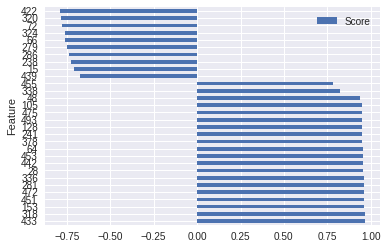

In [146]:
DTscores.sort_values('Score',ascending=False).iloc[:30].plot.barh(x='Feature')

feature selected: 28,48,64,105,128,153,241,281,318,336,338,378,451,472,433,442,453,493,475,455

## Feature selection with SelectKBest

In [136]:
sk = SelectKBest(k=100)
sk.fit(madelon_train, target)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=100, score_func=<function f_classif at 0x7ff69c49b950>)

In [137]:
sk_df = pd.DataFrame()
sk_df['Feature'] = sk.get_support(indices=True)
sk_df['F-score'] = sk.scores_[sk.get_support(indices=True)]
sk_df['p-values'] = sk.pvalues_[sk.get_support(indices=True)]

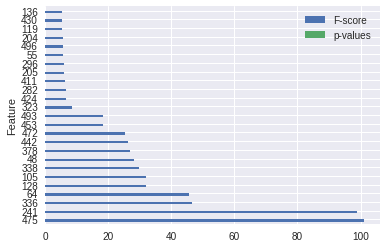

In [138]:
sk_df.sort_values('F-score',ascending=False).iloc[:25].plot.barh(x='Feature')

feature selected: 48,64,105,128,241,323,336,338,378,442,472,453,475,493

In [300]:
#madelon_train.columns[sk.get_support()] #both works

## Feature selection by RandomForest


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [140]:
rf_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('clf',RandomForestClassifier(random_state=42))
])

rfparams = {
    'clf__n_estimators':[10, 50,100],
    'clf__max_depth':[10,15,20,25]
}

In [141]:
gs_rf = GridSearchCV(rf_pipe, rfparams, cv= 3, n_jobs= -1)
gs_rf.fit(madelon_train, target)

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decreas...timators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__n_estimators': [10, 50, 100], 'clf__max_depth': [10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  This is separate from the ipykernel package so we can avoid doing imports until


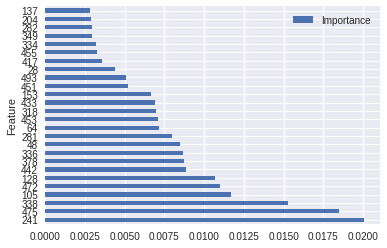

In [142]:
rf_feature = gs_rf.best_estimator_.named_steps['clf'].feature_importances_
rf_importance = pd.DataFrame(list(zip(madelon_train.columns, rf_feature))).rename(columns={0:'Feature',1:'Importance'})
rf_importance.sort('Importance', ascending= False).iloc[:26].plot.barh(x='Feature')

features selected: 28,48,64,105,128,153,241,281,318,336,338,378,475,472,442,453,433,451,493,417

In [ ]:
# itr_feature = [28,48,64,105,128,153,241,281,318,336,338,378,451,472,433,442,453,493,475,455]
# skb_feature = [48,64,105,128,241,323,336,338,378,442,472,453,475,493]
# rf_features = [28,48,64,105,128,153,241,281,318,336,338,378,475,472,442,453,433,451,493,417]

In [159]:
sel_feature = [28,48,64,105,128,153,241,281,318,336,338,378,472,442,453,475,493,451,433]

In [160]:
uci1_feat_sel = madelon_train[sel_feature]

In [161]:
uci1_feat_sel['target'] = target

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
uci1_feat_sel.head()

28   48   64  105  128  153  241  281  318  336  338  378  472  442  453  \
0  475  499  488  431  473  404  551  435  469  469  528  526  465  463  311   
1  491  460  485  593  487  585  474  535  506  465  431  464  485  503  606   
2  472  529  415  698  493  591  569  526  458  398  377  553  457  447  545   
3  472  429  387  451  475  448  538  456  462  385  509  424  500  536  426   
4  505  464  348  667  493  401  545  429  553  316  429  468  458  445  428   

   475  493  451  433  target  
0  549  338  474  442      -1  
1  454  650  481  569      -1  
2  602  572  472  565       1  
3  560  435  472  462       1  
4  557  435  492  435       1

In [163]:
uci1_feat_sel.to_pickle('/home/jovyan/Practice_exercise/Madelon/data/uci1_feature_selected.p')

## EDA on the selected 20 feature
Features from the Iterative unsupervised regressor method


In [164]:
uci1_feat_sel_stats = uci1_feat_sel.describe().T
uci1_feat_sel_stats

count        mean         std    min    25%    50%    75%    max
28      1999.0  480.608304   14.699634  438.0  468.0  481.0  493.0  520.0
48      1999.0  485.023012   43.009654  367.0  449.0  485.0  521.0  614.0
64      1999.0  497.892446   89.350408  214.0  436.0  500.0  560.0  768.0
105     1999.0  502.248624  134.396302    0.0  409.0  499.0  599.0  999.0
128     1999.0  479.134567   11.492018  435.0  471.0  479.0  487.0  516.0
153     1999.0  501.862431   98.160420  182.0  417.0  501.0  586.0  814.0
241     1999.0  498.875938   53.671475  333.0  454.0  499.0  543.0  653.0
281     1999.0  479.568784   51.319234  317.0  435.0  480.0  522.0  646.0
318     1999.0  486.436218   46.453824  346.0  447.5  486.0  525.0  607.0
336     1999.0  480.785393  104.492110  180.0  409.0  483.0  553.0  828.0
338     1999.0  500.408204   96.937115  207.0  433.5  496.0  568.0  829.0
378     1999.0  496.502751   58.039430  347.0  448.0  496.0  544.5  661.0
472     1999.0  480.380690   44.460571  347.0  451.0  480.0  511.5  621.0
442     1999.0  495.753377   97.297315  207.0  431.0  494.0  564.0  794.0
453     1999.0  481.431216  113.495442   84.0  398.5  488.0  562.0  807.0
475     1999.0  486.413707   74.512707  276.0  424.0  486.0  547.5  680.0
493     1999.0  496.571286  127.667117  130.0  404.0  504.0  586.0  920.0
451     1999.0  477.600800    9.265504  450.0  470.0  478.0  485.0  505.0
433     1999.0  498.709855   69.046624  263.0  440.0  499.0  557.0  719.0
target  1999.0    0.000500    1.000250   -1.0   -1.0    1.0    1.0    1.0

In [165]:
skew = []
median = []
for col in uci1_feat_sel_stats.index:
    feat_skew = stats.skew(uci1_feat_sel[col])
    feat_median = np.median(uci1_feat_sel[col])
    skew.append(feat_skew)
    median.append(feat_median)
    
    
uci1_feat_sel_stats['skew'] = skew
uci1_feat_sel_stats['median'] = median
uci1_feat_sel_stats

count        mean         std    min    25%    50%    75%    max  \
28      1999.0  480.608304   14.699634  438.0  468.0  481.0  493.0  520.0   
48      1999.0  485.023012   43.009654  367.0  449.0  485.0  521.0  614.0   
64      1999.0  497.892446   89.350408  214.0  436.0  500.0  560.0  768.0   
105     1999.0  502.248624  134.396302    0.0  409.0  499.0  599.0  999.0   
128     1999.0  479.134567   11.492018  435.0  471.0  479.0  487.0  516.0   
153     1999.0  501.862431   98.160420  182.0  417.0  501.0  586.0  814.0   
241     1999.0  498.875938   53.671475  333.0  454.0  499.0  543.0  653.0   
281     1999.0  479.568784   51.319234  317.0  435.0  480.0  522.0  646.0   
318     1999.0  486.436218   46.453824  346.0  447.5  486.0  525.0  607.0   
336     1999.0  480.785393  104.492110  180.0  409.0  483.0  553.0  828.0   
338     1999.0  500.408204   96.937115  207.0  433.5  496.0  568.0  829.0   
378     1999.0  496.502751   58.039430  347.0  448.0  496.0  544.5  661.0   
472     1999.0  480.380690   44.460571  347.0  451.0  480.0  511.5  621.0   
442     1999.0  495.753377   97.297315  207.0  431.0  494.0  564.0  794.0   
453     1999.0  481.431216  113.495442   84.0  398.5  488.0  562.0  807.0   
475     1999.0  486.413707   74.512707  276.0  424.0  486.0  547.5  680.0   
493     1999.0  496.571286  127.667117  130.0  404.0  504.0  586.0  920.0   
451     1999.0  477.600800    9.265504  450.0  470.0  478.0  485.0  505.0   
433     1999.0  498.709855   69.046624  263.0  440.0  499.0  557.0  719.0   
target  1999.0    0.000500    1.000250   -1.0   -1.0    1.0    1.0    1.0   

            skew  median  
28      0.033178   481.0  
48      0.029459   485.0  
64     -0.035587   500.0  
105    -0.023028   499.0  
128    -0.075601   479.0  
153     0.016932   501.0  
241    -0.004895   499.0  
281     0.015213   480.0  
318     0.034360   486.0  
336    -0.019368   483.0  
338     0.094435   496.0  
378     0.022132   496.0  
472    -0.038173   480.0  
442    -0.056972   494.0  
453    -0.127202   488.0  
475     0.002174   486.0  
493    -0.080432   504.0  
451     0.049027   478.0  
433     0.011692   499.0  
target -0.001001     1.0

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


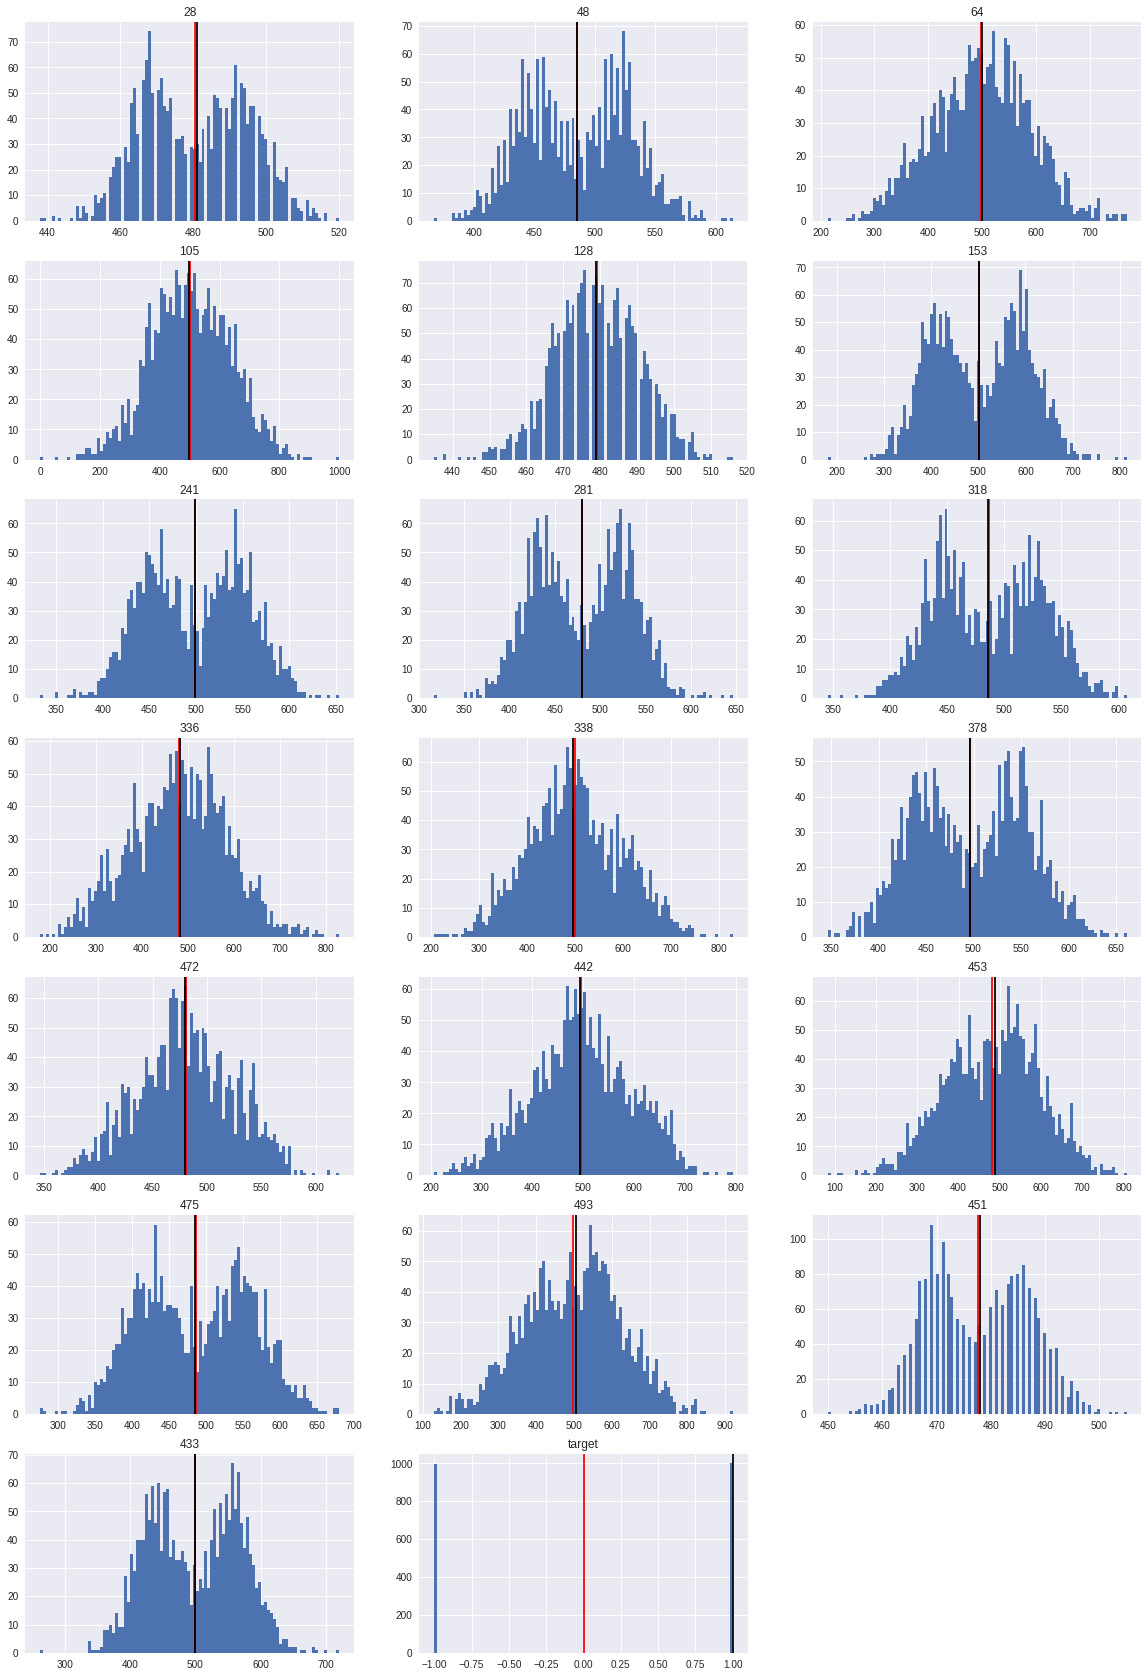

In [166]:
figure = plt.figure(figsize= (20,30))
for index, col in enumerate(uci1_feat_sel.columns):
    plt.subplot(7,3,1+index)
    plt.hist(uci1_feat_sel[col], bins = 100)
    plt.axvline(uci1_feat_sel[col].mean(), c='red')
    plt.axvline(uci1_feat_sel[col].median(), c='black')
    plt.title(col)
    plt.legend()

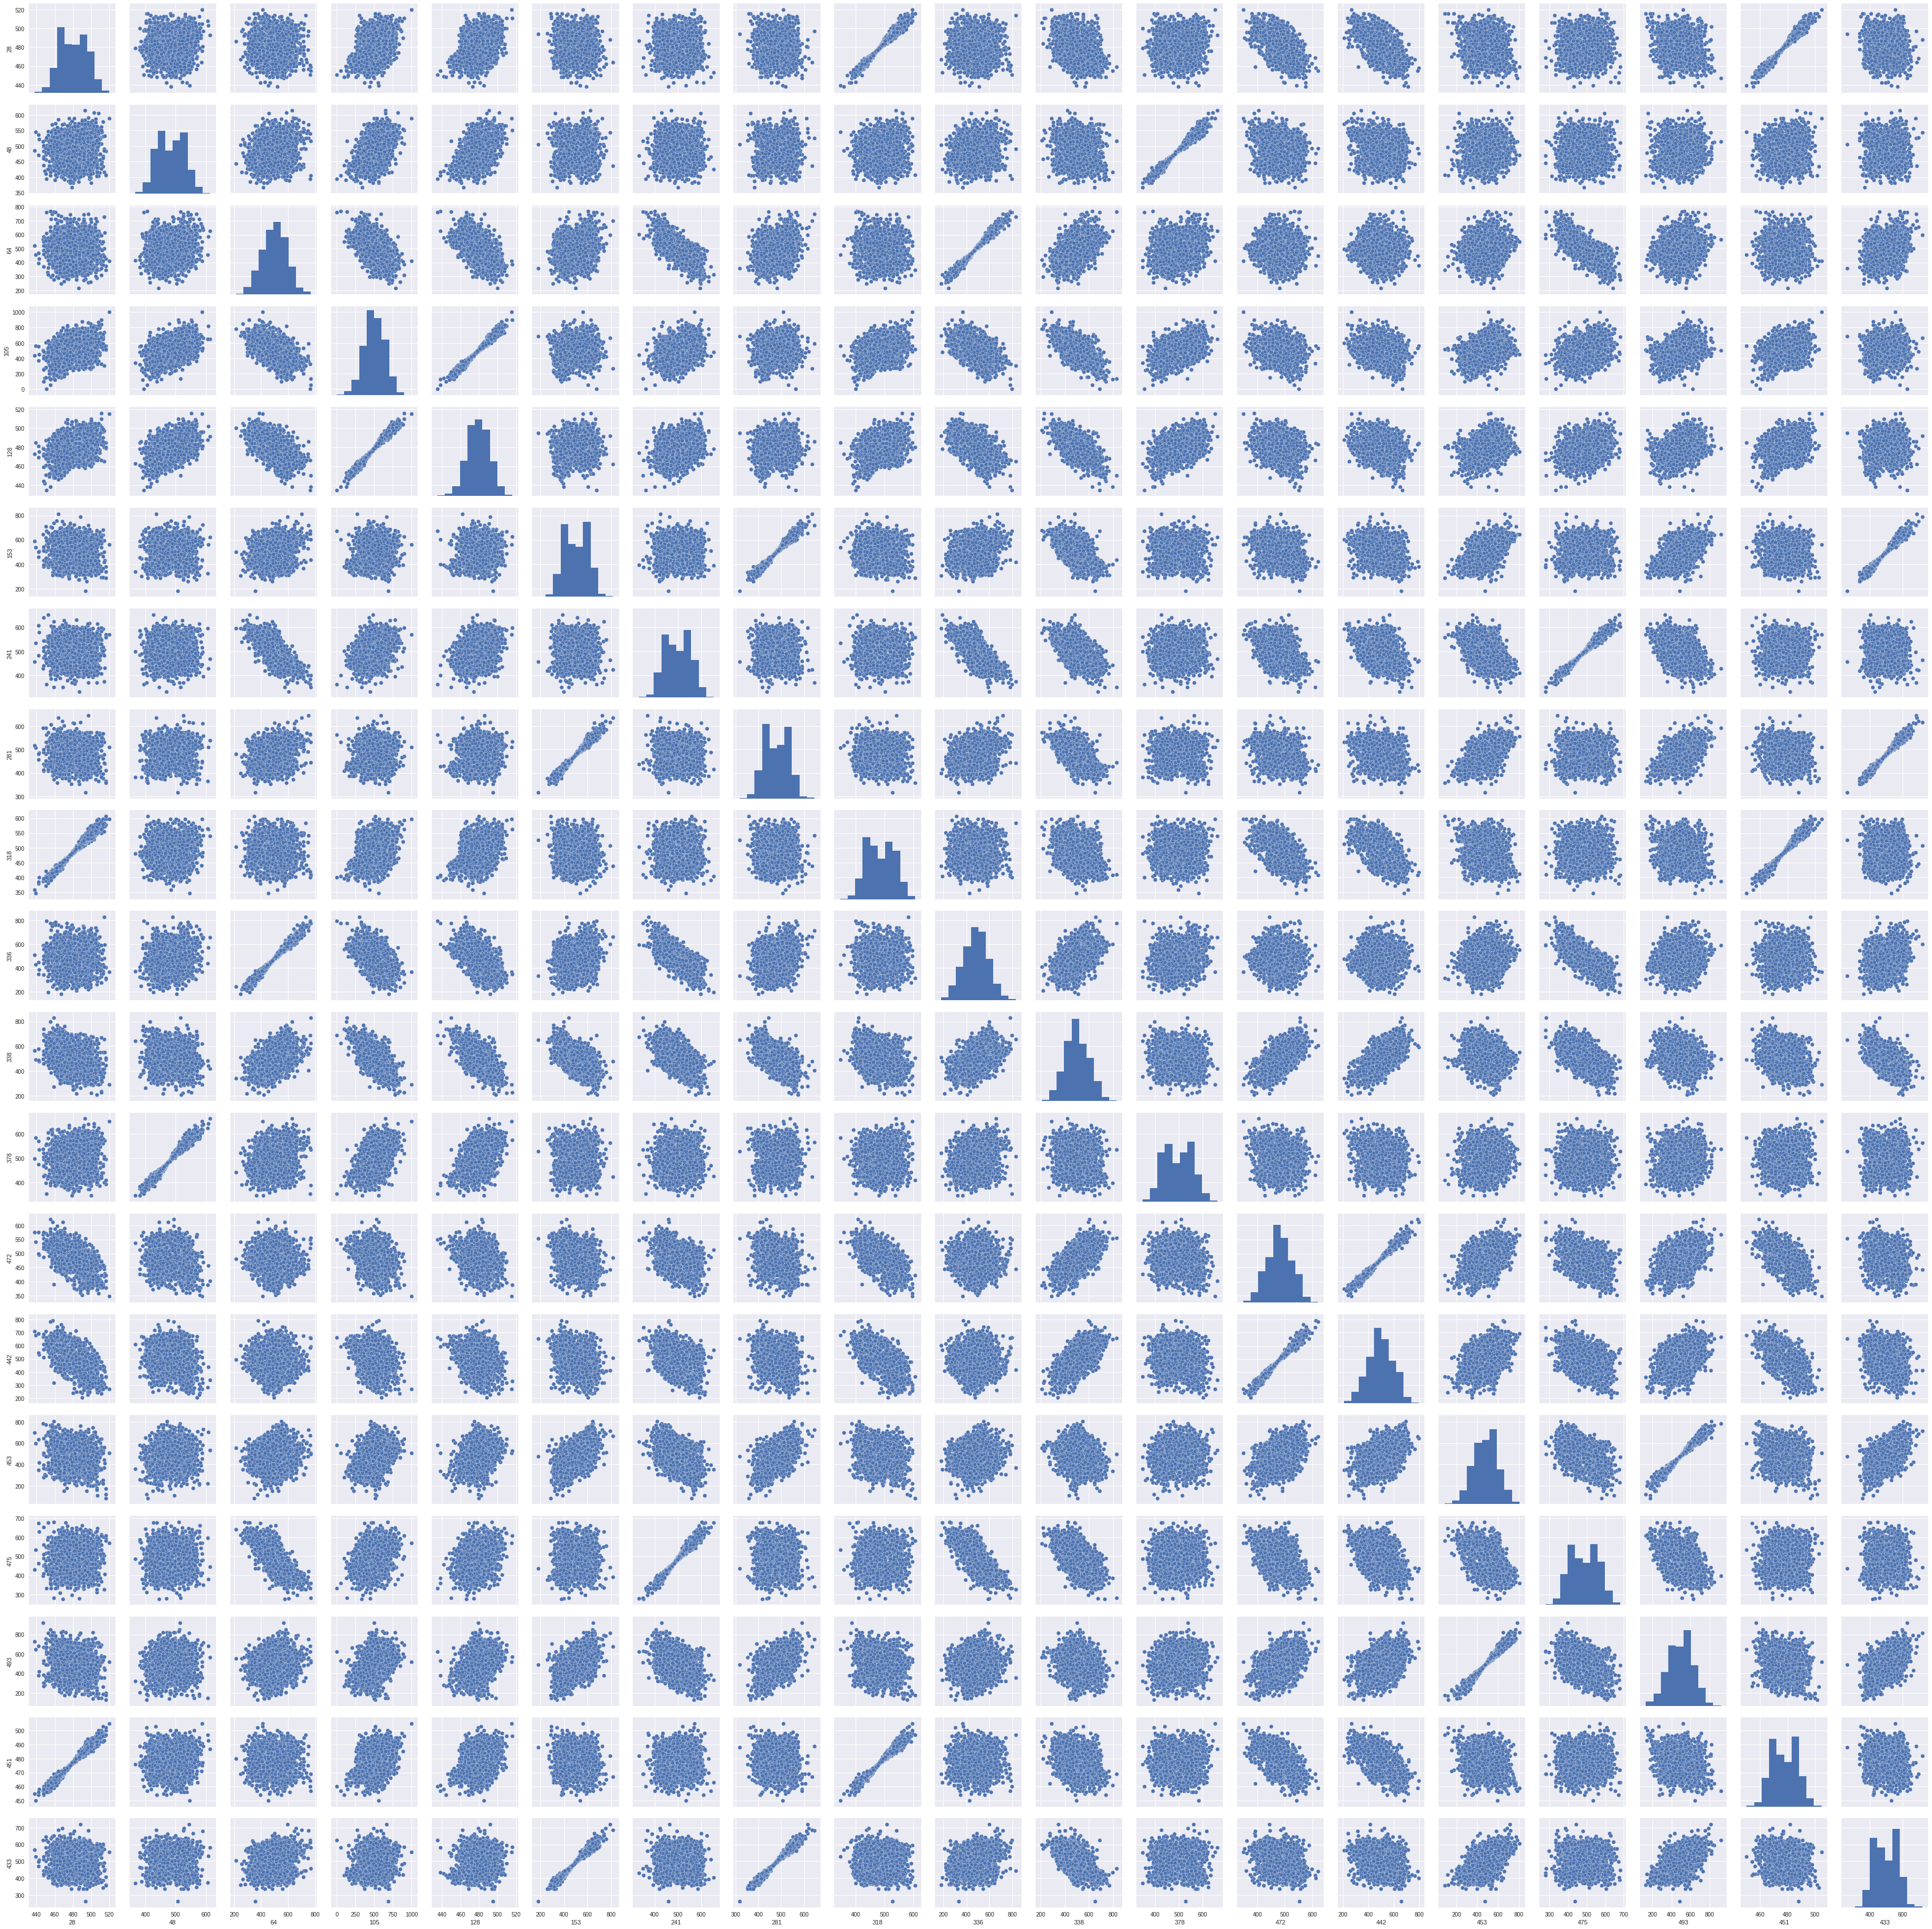

In [176]:
scatter = sns.pairplot(uci1_feat_sel)
scatter

## Scaling and deskewing the data 

In [19]:
from sklearn.preprocessing import StandardScaler
import scipy.stats as st

In [20]:
#for boxcox tranformation all values should be <0, column '105' does not have positive value.
madelon_feature.head()
(madelon_feature > 0).all(0)

28      True
48      True
64      True
105    False
128     True
153     True
241     True
281     True
318     True
336     True
338     True
378     True
433     True
442     True
451     True
453     True
455     True
472     True
475     True
493     True
dtype: bool

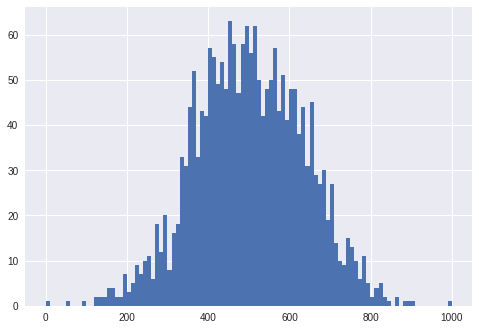

In [21]:
#plotting column 105 to clearly see the distribution
madelon_feature[105].hist(bins = 100)

There is one value in madelon_feature df, in column:105 that is 0, this is not allowing the boxcox to work. So I am replacing this value with 1. I also think that looking at the histogram, the data does not look skewed. SO this whole process of deskewing might be unnecessary.

In [22]:
madelon_feature[(madelon_feature[105]==0)]

28   48   64   105  128  153  241  281  318  336  338  378  433  442  \
576  451  395  761    0  435  675  363  563  400  795  686  355  627  664   

     451  453  455  472  475  493  
576  460  582  621  550  331  621

In [23]:
madelon_feature.replace(0, 1, inplace= True)
(madelon_feature > 0).all(0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


28     True
48     True
64     True
105    True
128    True
153    True
241    True
281    True
318    True
336    True
338    True
378    True
433    True
442    True
451    True
453    True
455    True
472    True
475    True
493    True
dtype: bool

In [24]:
madelon_feature.shape

(1999, 20)

In [25]:
madelon_box_cox_df = pd.DataFrame()
for col in madelon_feature.columns:
    box_cox_trans = st.boxcox(madelon_feature[col])[0]
    madelon_box_cox_df[col] = pd.Series(box_cox_trans)


In [26]:
madelon_box_cox_df['target'] = madelon_train['target']
madelon_box_cox_df.shape

(1999, 21)

## GridSearch for tuning hyperparameters of various models

In [168]:
target = uci1_feat_sel['target']
uci1_feat_sel = uci1_feat_sel.drop('target', axis =1)

In [169]:
uci1_selfeature_score = benchmark_score(uci1_feat_sel, target, LogisticRegression(), KNeighborsClassifier(), \
                                   DecisionTreeClassifier(), SVC(probability=True))

In [170]:
uci1_selfeature_score

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n          verbose=0, warm_start=False)  \
0                                            0.61515                                                                                                                                                                                                                             

   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n           metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n           weights='uniform')  \
0                                           0.950893                                                                                                                       

   DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best')  \
0                                           0.859472                                                                                                                                                                                                                                                                                                                    

   SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n  max_iter=-1, probability=True, random_state=None, shrinking=True,\n  tol=0.001, verbose=False)  
0                                             0.7575

In [171]:
uci1_selfeature_score.to_pickle('/home/jovyan/Practice_exercise/Madelon/data/uci1_selfeat_score.p')

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, roc_auc_score

In [177]:
xtrain, xtest, ytrain, ytest = train_test_split(uci1_feat_sel, target, test_size = 0.3)

In [181]:
#Gridsearch for DecsionTreeClassifier
pca_dt_pipe = Pipeline([('scaler', StandardScaler()),
                   ('pca', PCA()),
                   ('dt', DecisionTreeClassifier())])

pca_dt_params = {'pca__n_components' : [3,5,7],
                'dt__max_depth': [5, 10, 15, 20, 25, 30, 35, 40]}

In [182]:
gs_dt= GridSearchCV(pca_dt_pipe, pca_dt_params,  cv= 3, n_jobs=-1, scoring = pr_auc_scorer)

NameError: name 'pr_auc_scorer' is not defined

In [32]:
#this is printing accuracy score
pca_dt_pipe.score(X_test2, y_test2)

0.77666666666666662

In [35]:
#this is printing AUC score
print(roc_auc_score(y_test2, pca_dt_pipe.predict_proba(X_test2)[:,1]))

0.776965936009


## selectFromModel + decisiontree pipeline

In [348]:
sfm_dt_pipe = Pipeline([('scaler', StandardScaler()),
                   ('sfm', SelectFromModel(DecisionTreeClassifier())),
                   ('Dt', DecisionTreeClassifier())])

In [349]:
sfm_dt_pipe.fit(X_train2, y_train2)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=Non...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [350]:
sfm_dt_pipe.score(X_test2, y_test2)

0.76666666666666672

## RFE+ DecisionTree pipeline

In [351]:
rfe_dt_pipe = Pipeline([('scaler', StandardScaler()),
                   ('rfe', RFE(DecisionTreeClassifier())),
                   ('Dt', DecisionTreeClassifier())])

In [352]:
rfe_dt_pipe.fit(X_train2, y_train2)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfe', RFE(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
         ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [353]:
rfe_dt_pipe.score(X_test2, y_test2)

0.77333333333333332

## GridSearch or PCA and DecisionTreeClassifier

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
#try PCA with 20 components to see what are their variance and get info about which of the compnare more informative


In [37]:
pca_dt_pipe = Pipeline([('scaler', StandardScaler()),
                   ('pca', PCA()),
                   ('Dt', DecisionTreeClassifier())])

In [46]:
#what if I make pipeline with PCA and Adaboost
pca_dt_params = {'pca__n_components' : [ 1,3,5,7],
                'Dt__max_depth': [2,5 ,7, 10]}
                #'Dt__min_samples_split': range(2, 100, 10)}

In [47]:
roc_auc_scorer = make_scorer(roc_auc_score)

In [48]:
pca_dt_gs = GridSearchCV(pca_dt_pipe, pca_dt_params, scoring =roc_auc_scorer, cv =5, n_jobs=-1)


In [49]:
pca_dt_gs.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('Dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'pca__n_components': [1, 3, 5, 7], 'Dt__max_depth': [2, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [51]:
pca_dt_gs.score(X_test2, y_test2) 

0.79192940312948323

In [58]:
pca_dt_gs.best_params_

{'Dt__max_depth': 10, 'pca__n_components': 5}

In [52]:
pca_dt_gs.best_score_

0.77554265625585395

In [53]:
cv_results = pd.DataFrame(pca_dt_gs.cv_results_)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

In [54]:
cv_results

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.026241         0.002785         0.637189          0.646835   
1        0.018642         0.001330         0.624024          0.642821   
2        0.016716         0.002951         0.629577          0.656090   
3        0.142614         0.001401         0.629577          0.656090   
4        0.021524         0.001603         0.636413          0.662812   
5        0.016685         0.001355         0.665932          0.731735   
6        0.017395         0.001272         0.709208          0.788015   
7        0.150880         0.003353         0.709231          0.786453   
8        0.023075         0.001341         0.632031          0.684158   
9        0.019904         0.001374         0.655774          0.795075   
10       0.023391         0.003851         0.746254          0.874280   
11       0.129182         0.005688         0.741798          0.874113   
12       0.016567         0.001216         0.618476          0.725099   
13       0.020163         0.001435         0.662775          0.882586   
14       0.024577         0.001343         0.775543          0.951893   
15       0.095193         0.001263         0.753143          0.953616   

   param_Dt__max_depth param_pca__n_components  \
0                    2                       1   
1                    2                       3   
2                    2                       5   
3                    2                       7   
4                    5                       1   
5                    5                       3   
6                    5                       5   
7                    5                       7   
8                    7                       1   
9                    7                       3   
10                   7                       5   
11                   7                       7   
12                  10                       1   
13                  10                       3   
14                  10                       5   
15                  10                       7   

                                           params  rank_test_score  \
0    {'Dt__max_depth': 2, 'pca__n_components': 1}               10   
1    {'Dt__max_depth': 2, 'pca__n_components': 3}               15   
2    {'Dt__max_depth': 2, 'pca__n_components': 5}               13   
3    {'Dt__max_depth': 2, 'pca__n_components': 7}               13   
4    {'Dt__max_depth': 5, 'pca__n_components': 1}               11   
5    {'Dt__max_depth': 5, 'pca__n_components': 3}                7   
6    {'Dt__max_depth': 5, 'pca__n_components': 5}                6   
7    {'Dt__max_depth': 5, 'pca__n_components': 7}                5   
8    {'Dt__max_depth': 7, 'pca__n_components': 1}               12   
9    {'Dt__max_depth': 7, 'pca__n_components': 3}                9   
10   {'Dt__max_depth': 7, 'pca__n_components': 5}                3   
11   {'Dt__max_depth': 7, 'pca__n_components': 7}                4   
12  {'Dt__max_depth': 10, 'pca__n_components': 1}               16   
13  {'Dt__max_depth': 10, 'pca__n_components': 3}                8   
14  {'Dt__max_depth': 10, 'pca__n_components': 5}                1   
15  {'Dt__max_depth': 10, 'pca__n_components': 7}                2   

    split0_test_score  split0_train_score       ...         split2_test_score  \
0            0.585528            0.652083       ...                  0.690498   
1            0.585528            0.652083       ...                  0.690498   
2            0.603950            0.666221       ...                  0.694529   
3            0.603950            0.666221       ...                  0.694529   
4            0.604460            0.667865       ...                  0.686875   
5            0.658196            0.735675       ...                  0.684681   
6            0.689273            0.786582       ...                  0.777812   
7            0.689273            0.786582       ...                  0.7